### Baselines

This Notebook shows you to recreate the baseline results from the paper. It is currently set up to produce results for models "nflow", "ctgan", "tvae", "bayesian_network", and "copulagan" for the breast cancer dataset.

**Imports**

In [1]:
# Third party
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
import seaborn as sns

# Goggle
from goggle.GoggleModel import GoggleModel

# Synthcity
from synthcity.plugins.core.dataloader import GenericDataLoader
from synthcity.plugins import Plugins

/home/rob/miniconda3/envs/goggle10/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


2023-03-07 15:50:51,972 - Created a temporary directory at /tmp/tmpa708k2uv
2023-03-07 15:50:51,973 - Writing /tmp/tmpa708k2uv/_remote_module_non_scriptable.py


**Load data**

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

dataset = "breast"
X = pd.read_csv("../data/breast_cancer.csv")

ind = list(range(len(X.columns)))
ind = [x for x in ind if x != X.columns.get_loc("target")]
col_list = X.columns[ind]
ct = ColumnTransformer(
    [("scaler", StandardScaler(), col_list)], remainder="passthrough"
)

X_ = ct.fit_transform(X)
X = pd.DataFrame(X_, index=X.index, columns=X.columns)

X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,Worst texture,Worst perimeter,Worst area,Worst smoothness,Worst compactness,Worst concavity,Worst concave points,Worst symmetry,Worst fractal dimension,target
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015,1.0
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190,1.0
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391,1.0
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010,1.0
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100,1.0


**Fit model**

Re-run the notebook with different baseline models to generate all the baseline data from the paper.

In [3]:
X_train, X_test = train_test_split(X, random_state=0, test_size=0.2, shuffle=True)
gens = Plugins()

baseline_models = ["nflow", "ctgan", "tvae", "bayesian_network", "copulagan"]


gen = gens.get(baseline_models[3])

In [4]:
gen.fit(X_train)

**Evaluate synthetic data**

In [5]:
X_synth = gen.generate(count=X_test.shape[0]).dataframe()
X_synth.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,Worst texture,Worst perimeter,Worst area,Worst smoothness,Worst compactness,Worst concavity,Worst concave points,Worst symmetry,Worst fractal dimension,target
0,-1.253241,2.052580,-1.258600,-1.043747,-1.190715,-1.108719,-0.927390,-0.999448,-0.711990,-0.477153,...,1.811504,-1.177974,-0.939697,-0.951044,-0.920702,-0.968628,-1.015398,-0.952593,-0.666884,0.0
1,0.937274,-0.831732,1.060790,0.892043,0.619547,1.920809,0.891550,1.349094,1.038916,0.419834,...,-1.188706,1.112855,1.160748,0.604953,1.748612,0.432184,1.332609,1.130547,1.335710,1.0
2,-0.319801,0.031192,-0.303265,-0.371977,0.427565,0.195148,0.027030,-0.188458,0.625523,0.297169,...,0.053495,-0.209517,-0.266638,0.584035,0.035880,0.124069,-0.051127,0.376642,0.341852,0.0
3,-0.867192,-0.839083,-0.883897,-0.801497,0.390370,-0.948535,-0.758410,-0.696256,-1.978796,-0.672085,...,-0.336854,-0.777469,-0.694278,-0.457126,-1.100806,-0.926133,-0.861778,-2.154725,-0.756207,0.0
4,-0.191651,-1.175417,-0.215319,-0.293020,1.602422,-0.185673,-0.549743,-0.286939,-0.744763,0.279320,...,-0.565330,-0.291987,-0.345962,1.336068,-0.041432,-0.332833,0.179146,0.882643,-0.203926,0.0


In [6]:
from synthcity.metrics import eval_statistical
from synthcity.metrics import eval_detection
from synthcity.metrics import eval_performance


def evaluate_synthetic(X_synth, X_test):
    quality_evaluator = eval_statistical.AlphaPrecision()
    qual_res = quality_evaluator.evaluate(X_test, X_synth)
    qual_res = {k: v for (k, v) in qual_res.items() if "naive" in k}
    qual_score = np.mean(list(qual_res.values()))

    xgb_evaluator = eval_performance.PerformanceEvaluatorXGB()
    linear_evaluator = eval_performance.PerformanceEvaluatorLinear()
    mlp_evaluator = eval_performance.PerformanceEvaluatorMLP()
    xgb_score = xgb_evaluator.evaluate(X_test, X_synth)
    linear_score = linear_evaluator.evaluate(X_test, X_synth)
    mlp_score = mlp_evaluator.evaluate(X_test, X_synth)
    gt_perf = (xgb_score["gt"] + linear_score["gt"] + mlp_score["gt"]) / 3
    synth_perf = (
        xgb_score["syn_ood"] + linear_score["syn_ood"] + mlp_score["syn_ood"]
    ) / 3

    xgb_detector = eval_detection.SyntheticDetectionXGB()
    mlp_detector = eval_detection.SyntheticDetectionMLP()
    gmm_detector = eval_detection.SyntheticDetectionGMM()
    xgb_det = xgb_detector.evaluate(X_test, X_synth)
    mlp_det = mlp_detector.evaluate(X_test, X_synth)
    gmm_det = gmm_detector.evaluate(X_test, X_synth)
    det_score = (xgb_det["mean"] + mlp_det["mean"] + gmm_det["mean"]) / 3

    return qual_score, (gt_perf, synth_perf), det_score


X_synth_loader = GenericDataLoader(
    X_synth,
    target_column="target",
)
X_test_loader = GenericDataLoader(
    X_test,
    target_column="target",
)

res = evaluate_synthetic(X_synth_loader, X_test_loader)
print(f"Quality: {res[0]:.3f}")
print(f"Detection: {res[2]:.3f}")
print(
    f"Performance on real: {res[1][0]:.3f}, on synth: {res[1][1]:.3f}, diff: {res[1][0] - res[1][1]:.3f}"
)

Quality: 0.621
Detection: 0.514
Performance on real: 0.980, on synth: 0.976
diff: 0.004


**Generate TSNE plots**

In [7]:
X_test["label"] = "Original"
X_synth["label"] = "Synthetic"

concat_df = pd.concat([X_test, X_synth], axis=0)
y_data = concat_df["label"]
x_data = concat_df.drop(["label", "target"], axis=1)

In [8]:
from sklearn.manifold import TSNE
import seaborn as sns

tsne = TSNE(n_components=2, verbose=0, random_state=0)
z = tsne.fit_transform(x_data)
df = pd.DataFrame()
df["y"] = y_data
df["comp-1"] = z[:, 0]
df["comp-2"] = z[:, 1]

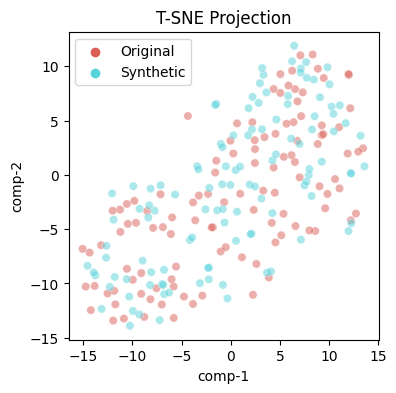

In [9]:
plt.figure(figsize=(4, 4))
sns.scatterplot(
    x="comp-1",
    y="comp-2",
    hue=df.y.tolist(),
    palette=sns.color_palette("hls", 2),
    alpha=0.5,
    data=df,
).set(title=f"T-SNE Projection")
plt.xlabel("comp-1")
plt.ylabel("comp-2")
plt.legend()

plt.show()